In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_NAMES = ['sp', 'poa', 'fc', 'kc', 'nl']
DATASETS = {}
for ds in DATASET_NAMES:
    DATASETS[ds] = np.load(f'{ds}/data.npz')

print(DATASETS['fc'].files)
print(DATASETS['fc']['dist_geo'].shape)
print(DATASETS['fc']['dist_eucli'])

['dist_eucli', 'dist_geo', 'idx_eucli', 'idx_geo', 'X_test', 'X_train', 'y_test', 'y_train']
(83136, 60)
[[  117.41379821   151.42654985   316.62912062 ... 36129.10176033
  36324.72075632 37866.46615601]
 [   69.35416357   170.75128119   180.13984978 ... 36067.70756515
  36097.90194745 36786.81670191]
 [   48.04164862   455.72798928   496.10281218 ... 36381.51299807
  36382.31339578 36382.83563755]
 ...
 [ 2597.50707537  2614.13427478 17794.49848472 ... 36469.48897415
  36825.30807832 37799.03387839]
 [  382.42777097   533.67218411   552.20014504 ... 36086.81714985
  36184.25936805 36285.83479847]
 [ 1430.42181711  1481.78372241  2072.94875068 ... 36844.46826866
  36932.2155635  37070.49995256]]


In [3]:
def draw_cumulative_graph(arr, n_steps=1000, title='Cumulative distribution'):
    arr_sorted = np.sort(arr.flatten())

    mean = np.mean(arr)
    median = np.median(arr)

    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_title(title)
    plt.xscale('log')
    ax.hist(arr_sorted, bins=n_steps, cumulative=True, density=True, histtype='step')
    ax.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
    ax.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
    ax.legend()
    plt.show()

=== sp ===


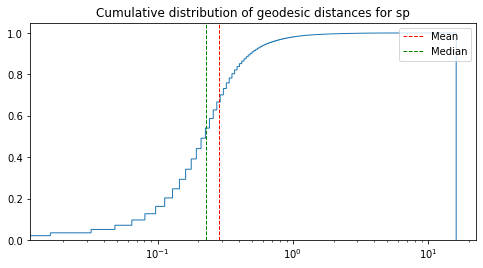

=== poa ===


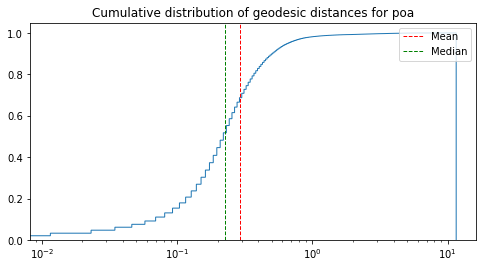

=== fc ===


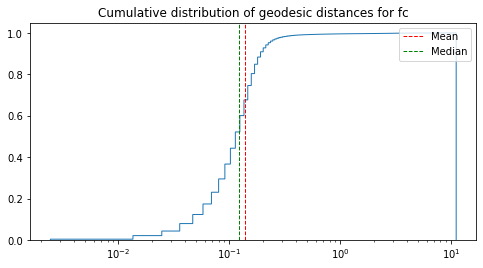

=== kc ===


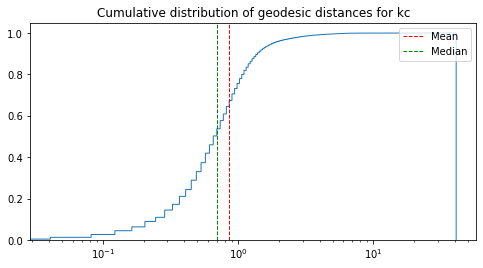

=== nl ===


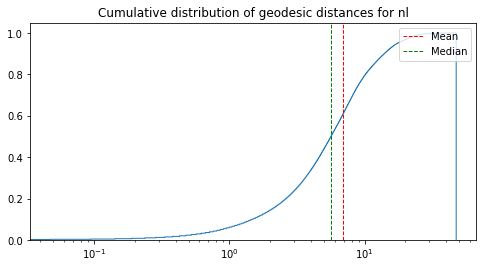

In [4]:
for ds in DATASET_NAMES:
    print(f'=== {ds} ===')
    draw_cumulative_graph(DATASETS[ds]['dist_geo'], title=f'Cumulative distribution of geodesic distances for {ds}')

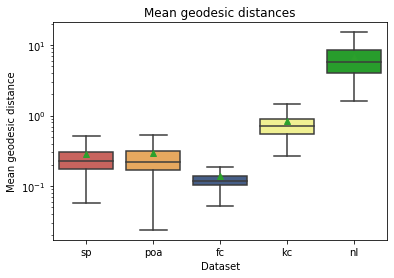

In [6]:
def generate_dist_boxplots():
    data = [np.mean(DATASETS[ds]['dist_geo'], axis=1) for ds in DATASET_NAMES]
    g = sns.boxplot(
        data=data,
        palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["light orange"], sns.xkcd_rgb["denim blue"], sns.xkcd_rgb["pale yellow"], sns.xkcd_rgb["green"]],
        showmeans=True,
        showfliers = False
    )
    g.set_yscale('log')
    g.set_xticklabels(DATASET_NAMES)
    g.set_title('Mean geodesic distances')
    g.set_xlabel('Dataset')
    g.set_ylabel('Mean geodesic distance')

generate_dist_boxplots()

In [6]:
def neighbour_count_table(metric='mean'):
    func = np.mean if metric == 'mean' else np.median
    print(f"{metric} number of neighbours in range of distances:")
    print("\t\t" + "\t|\t".join(DATASET_NAMES))
    print("---------------------------------------------------------------------")
    for dist in [0.001, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 10.0]:
        # print(f'=== Dist: {dist} ===')
        data = [round(func(count_neighbours_in_distance(DATASETS[ds]['dist_geo'], dist)), 1) for ds in DATASET_NAMES]
        print(f'Dist {dist} \t' + '\t|\t'.join([str(d) for d in data]))

def count_neighbours_in_distance(arr, dist):
    return np.sum(arr < dist, axis=1)


In [7]:
# neighbour_count_table('mean')
neighbour_count_table('median')

median number of neighbours in range of distances:
		fc	|	kc	|	poa	|	sp	|	nl
---------------------------------------------------------------------
Dist 0.001 	0.0	|	0.0	|	0.0	|	0.0	|	0.0
Dist 0.01 	0.0	|	0.0	|	1.0	|	0.0	|	0.0
Dist 0.02 	1.0	|	0.0	|	1.0	|	1.0	|	0.0
Dist 0.04 	3.0	|	0.0	|	2.0	|	2.0	|	0.0
Dist 0.06 	7.0	|	0.0	|	3.0	|	3.0	|	0.0
Dist 0.08 	13.0	|	0.0	|	5.0	|	4.0	|	0.0
Dist 0.1 	20.0	|	1.0	|	7.0	|	7.0	|	0.0
Dist 0.2 	60.0	|	3.0	|	22.0	|	22.0	|	0.0
Dist 0.3 	60.0	|	6.0	|	45.0	|	46.0	|	0.0
Dist 0.4 	60.0	|	11.0	|	60.0	|	60.0	|	1.0
Dist 0.5 	60.0	|	15.0	|	60.0	|	60.0	|	1.0
Dist 1.0 	60.0	|	51.0	|	60.0	|	60.0	|	3.0
Dist 10.0 	60.0	|	60.0	|	60.0	|	60.0	|	60.0


<table class="wikitable">
<caption>Degree precision versus length
</caption>
<tbody><tr>
<th>decimal<br>places</th>
<th>decimal<br>degrees</th>
<th>Object that can be <i>unambiguously</i> recognized at this scale</th>
<th>N/S or E/W<br> at equator</th>
<th>E/W at<br>23N/S</th>
<th>E/W at<br>45N/S</th>
<th>E/W at<br>67N/S
</th></tr>
<tr>
<th>0
</th>
<td>1.0</td>
<td>country or large region</td>
<td>111&nbsp;km</td>
<td>102&nbsp;km</td>
<td>78.7&nbsp;km</td>
<td>43.5&nbsp;km
</td></tr>
<tr>
<th>1
</th>
<td>0.1</td>
<td>large city or district</td>
<td>11.1&nbsp;km</td>
<td>10.2&nbsp;km</td>
<td>7.87&nbsp;km</td>
<td>4.35&nbsp;km
</td></tr>
<tr>
<th>2
</th>
<td>0.01</td>
<td>town or village</td>
<td>1.11&nbsp;km</td>
<td>1.02&nbsp;km</td>
<td>0.787&nbsp;km</td>
<td>0.435&nbsp;km
</td></tr>
<tr>
<th>3
</th>
<td>0.001</td>
<td>neighborhood, street</td>
<td>111&nbsp;m</td>
<td>102&nbsp;m</td>
<td>78.7&nbsp;m</td>
<td>43.5&nbsp;m
</td></tr>
<tr>
<th>4
</th>
<td>0.0001</td>
<td>individual street, large buildings</td>
<td>11.1&nbsp;m</td>
<td>10.2&nbsp;m</td>
<td>7.87&nbsp;m</td>
<td>4.35&nbsp;m
</td></tr>
<tr>
<th>5
</th>
<td>0.00001</td>
<td>individual trees, houses</td>
<td>1.11&nbsp;m</td>
<td>1.02&nbsp;m</td>
<td>0.787&nbsp;m</td>
<td>0.435&nbsp;m
</td></tr>
<tr>
<th>6
</th>
<td>0.000001</td>
<td>individual humans</td>
<td>111&nbsp;mm</td>
<td>102&nbsp;mm</td>
<td>78.7&nbsp;mm</td>
<td>43.5&nbsp;mm
</td></tr>
<tr>
<th>7
</th>
<td>0.0000001</td>
<td>practical limit of commercial surveying</td>
<td>11.1&nbsp;mm</td>
<td>10.2&nbsp;mm</td>
<td>7.87&nbsp;mm</td>
<td>4.35&nbsp;mm
</td></tr>
<tr>
<th>8
</th>
<td style="white-space:nowrap">0.00000001
</td>
</td>
<td>specialized surveying (e.g. <a href="/wiki/Tectonic_plate" class="mw-redirect" title="Tectonic plate">tectonic plate</a> mapping)</td>
<td>1.11&nbsp;mm</td>
<td>1.02&nbsp;mm</td>
<td>0.787&nbsp;mm</td>
<td>0.435&nbsp;mm
</td></tr></tbody></table>

Source: https://en.wikipedia.org/wiki/Decimal_degrees 

=== sp ===
(55078,)
Min: 11.237171963383721
Max: 14.47634630125661


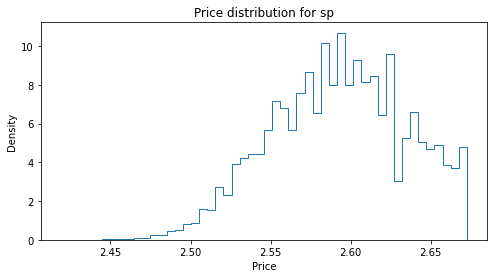

=== poa ===
(12294,)
Min: 11.156250521031495
Max: 13.971080801163078


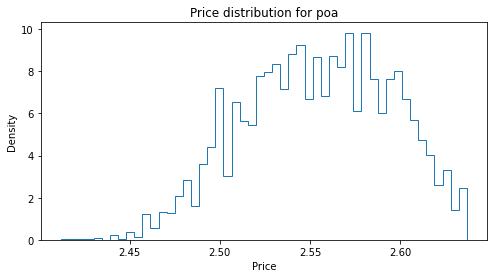

=== fc ===
(66510,)
Min: 8.160518247477505
Max: 12.916568464424731


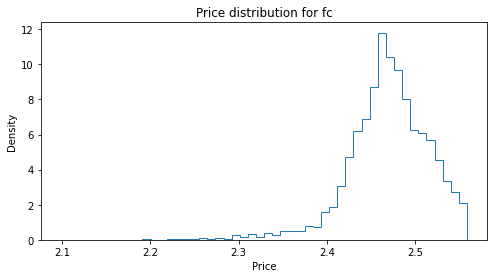

=== kc ===
(17286,)
Min: 11.225243392518447
Max: 15.770309654436833


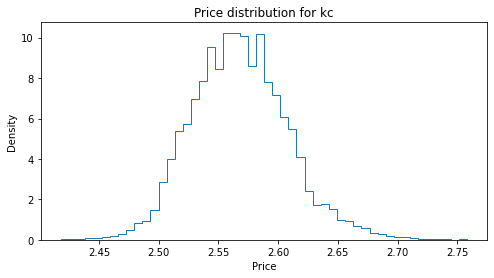

=== nl ===
(4295,)
Min: 149000
Max: 4700000


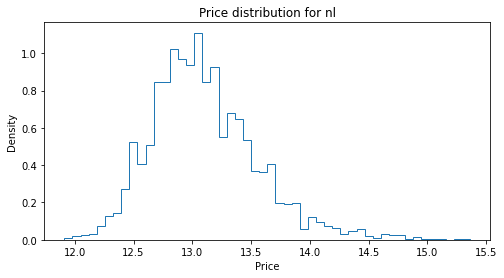

In [29]:
for ds in DATASET_NAMES:
    print(f'=== {ds} ===')
    fig, ax = plt.subplots(figsize=(8,4))
    price_data = DATASETS[ds]['y_train']
    print(price_data.shape)
    # Print the min and max of price_data
    print(f'Min: {np.min(price_data)}')
    print(f'Max: {np.max(price_data)}')
    ax.set_title(f'Price distribution for {ds}')
    ax.hist(price_data, bins=50, density=True, histtype='step')
    ax.set_ylabel('Density')
    ax.set_xlabel('Price')
    plt.show()


In [12]:
import pandas as pd
# Create dataframe for the data
stats_df = pd.DataFrame()
for ds in DATASET_NAMES:
    features = DATASETS[ds]['X_train'].shape[1]
    samples = DATASETS[ds]['X_train'].shape[0] + DATASETS[ds]['X_test'].shape[0]
    target_prices = np.exp(np.concatenate((DATASETS[ds]['y_train'], DATASETS[ds]['y_test'])))
    # if ds == 'nl':
    #     target_prices = np.log(target_prices)
    stats_df = stats_df.append({
        'Dataset': ds.upper(),
        'Attr': features,
        'Samples': samples,
        'Mean': round(np.mean(target_prices)),
        'Std': round(np.std(target_prices)),
    }, ignore_index=True)
    

stats_df.set_index('Dataset', inplace=True)
stats_df = stats_df[['Attr', 'Samples', 'Mean', 'Std']]
stats_df['Samples'] = stats_df['Samples'].astype(int)
stats_df['Attr'] = stats_df['Attr'].astype(int)
stats_df['Mean'] = stats_df['Mean'].astype(int)
stats_df['Std'] = stats_df['Std'].astype(int)
stats_df

,Attr,Samples,Mean,Std
Dataset,,,,
SP,7,68848,741952,411643
POA,7,15368,443798,228518
FC,11,83136,155165,76507
KC,18,21608,540098,367156
NL,13,5369,551550,349857


In [ ]:
print(stats_df.to_latex())